In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 

## Introduction

- An estimated 1.2 million people are killed in road crashes each year, and as many as 50 million are injured. Road traffic injuries are predictable and preventable, but the study of data is of utmost importance. Understanding the factors around which these tragedies occurs, will give us the insight needed in order to prevent them.

- Using the Database of the SDOT Traffic Management Division of Seattle, the main objectives of this project are to build a model that can predict the probability of each type of accident (property damage or injury) as well as the key factors involved in them. 

## Readind Data

In [3]:
database = pd.read_csv('../../Data-Collisions.csv')

/home/amoraes/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
np.random.seed(1)

## Understanding data

In [6]:
database.describe().T

,count,mean,std,min,25%,50%,75%,max
SEVERITYCODE,194673.0,1.298901e+00,4.577776e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
X,189339.0,-1.223305e+02,2.997605e-02,-1.224191e+02,-1.223487e+02,-1.223302e+02,-1.223119e+02,-1.222389e+02
Y,189339.0,4.761954e+01,5.615664e-02,4.749557e+01,4.757596e+01,4.761537e+01,4.766366e+01,4.773414e+01
OBJECTID,194673.0,1.084794e+05,6.264972e+04,1.000000e+00,5.426700e+04,1.069120e+05,1.622720e+05,2.195470e+05
INCKEY,194673.0,1.410915e+05,8.663440e+04,1.001000e+03,7.038300e+04,1.233630e+05,2.033190e+05,3.314540e+05
COLDETKEY,194673.0,1.412988e+05,8.698654e+04,1.001000e+03,7.038300e+04,1.233630e+05,2.034590e+05,3.329540e+05
INTKEY,65070.0,3.755845e+04,5.174599e+04,2.380700e+04,2.866700e+04,2.997300e+04,3.397300e+04,7.575800e+05
SEVERITYCODE.1,194673.0,1.298901e+00,4.577776e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
PERSONCOUNT,194673.0,2.444427e+00,1.345929e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.100000e+01
PEDCOUNT,194673.0,3.713920e-02,1.981499e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00


In [5]:
#First check the shape of the database
database.shape

(194673, 38)

In [6]:
#Check what are the type of columns that we will be working with
database.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
#Target:
database['SEVERITYCODE'].unique()

array([2, 1])

### Missing Values

<AxesSubplot:>

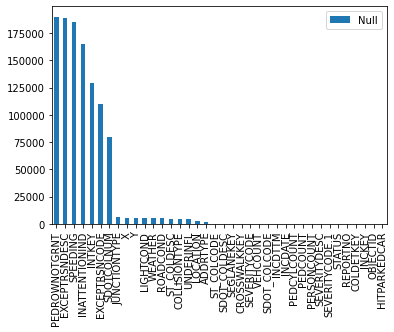

In [9]:
#We have a lot of features. Let's check which of them have null values and drop the ones we will not be able to use
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
missing_values_count.sort_values(by= 'Null' , ascending = False).plot(kind="bar")

In [9]:
#We drop the features with the highest ratio of missing values.
# Aside from that, we will drop some features that don't add any value to the data (number of report and such).
drop_features = ['PEDROWNOTGRNT', 'EXCEPTRSNDESC', 'SPEEDING', 'INATTENTIONIND', 'INTKEY', 'EXCEPTRSNCODE', 'SDOTCOLNUM', 'REPORTNO', 
                 'LOCATION', 'INCDATE', 'INCKEY','COLDETKEY']
database.drop(drop_features, axis = 1, inplace = True)

In [10]:
#Now it looks much cleaner
database.shape

(194673, 26)

In [11]:
#We now check which features are categorical. 
database.select_dtypes(include=["object"]).head(5)

,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,Matched,Intersection,Injury Collision,Angles,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,N
1,Matched,Block,Property Damage Only Collision,Sideswipe,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,Matched,Block,Property Damage Only Collision,Parked Car,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,N
3,Matched,Block,Property Damage Only Collision,Other,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,N
4,Matched,Intersection,Injury Collision,Angles,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,N


## Feature Engineering

### Dates

In [12]:
#Let's play with dates. We are interested in the time of the accidents only. 
#We will get it, put it in a new column and drop the "INCDTTM" column.
dates_regex = [ ]

import re
prefixRegex = re.compile(r'(\d{0,2}/\d{0,2}/\d{0,4})(\s)(\d{0,2}:\d{0,2}:\d{0,2}\s[P|A]M)')
for i in range(len(database)):
    try:
        pf = prefixRegex.search(database['INCDTTM'][i]).group(3)
    except AttributeError:
        pf1 = np.nan
        dates_regex.append(pf1)
    else:
        dates_regex.append(pf)
database.insert(1, 'Time', dates_regex, True)
database.drop('INCDTTM', axis = 1, inplace = True)
database.head(5)

,SEVERITYCODE,Time,X,Y,OBJECTID,STATUS,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,2:54:00 PM,-122.323148,47.703140,1,Matched,Intersection,2,Injury Collision,Angles,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,6:55:00 PM,-122.347294,47.647172,2,Matched,Block,1,Property Damage Only Collision,Sideswipe,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,10:20:00 AM,-122.334540,47.607871,3,Matched,Block,1,Property Damage Only Collision,Parked Car,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,9:26:00 AM,-122.334803,47.604803,4,Matched,Block,1,Property Damage Only Collision,Other,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,8:04:00 AM,-122.306426,47.545739,5,Matched,Intersection,2,Injury Collision,Angles,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


In [13]:
#Let's check if we had any null value.
database['Time'].isnull().sum()

30526

In [14]:
#We have a lot of Null values but we will leave it at that for now. 
#We do some parsing to the dates.
for i in range(len(database)):
    database['Time'][i] = pd.to_datetime(database['Time'][i], format="%I:%M:%S %p")
print('Done!')
day_parts = database['Time'].dt.hour
database['Frame'] = day_parts

<ipython-input-14-caf5a83040e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['Time'][i] = pd.to_datetime(database['Time'][i], format="%I:%M:%S %p")


Done!


In [15]:
#Now that we have it in date format, we can work with it. 
#We will divide our "Time" in 5 categorical variables according to different parts of the day.
for i in range(len(database)):
    if database['Frame'][i] >= 5 and database['Frame'][i] <=8:
        database['Frame'][i] = 'Early Morning'
    elif database['Frame'][i] >=9 and database['Frame'][i] <=12:
        database['Frame'][i] = 'Late Morning'
    elif database['Frame'][i] >= 13 and database['Frame'][i] <=16:
        database['Frame'][i] = 'Afternoon'
    elif database['Frame'][i] >= 17 and database['Frame'][i] <=20:
        database['Frame'][i] = 'Evening'
    elif database['Frame'][i] >= 21 and database['Frame'][i] <=23:
        database['Frame'][i] = 'Night'
    elif database['Frame'][i] >= 0 and database['Frame'][i] <=4:
        database['Frame'][i] = 'Night'
database.drop('Time', axis=1, inplace= True)
database

<ipython-input-15-c691b127bb9c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['Frame'][i] = 'Afternoon'
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-15-c691b127bb9c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['Frame'][i] = 'Evening'
<ipython-input-15-c691b127bb9c>:7: Set

,SEVERITYCODE,X,Y,OBJECTID,STATUS,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Frame
0,2,-122.323148,47.703140,1,Matched,Intersection,2,Injury Collision,Angles,2,...,N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N,Afternoon
1,1,-122.347294,47.647172,2,Matched,Block,1,Property Damage Only Collision,Sideswipe,2,...,0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N,Evening
2,1,-122.334540,47.607871,3,Matched,Block,1,Property Damage Only Collision,Parked Car,4,...,0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N,Late Morning
3,1,-122.334803,47.604803,4,Matched,Block,1,Property Damage Only Collision,Other,3,...,N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N,Late Morning
4,2,-122.306426,47.545739,5,Matched,Intersection,2,Injury Collision,Angles,2,...,0,Raining,Wet,Daylight,10,Entering at angle,0,0,N,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,Matched,Block,2,Injury Collision,Head On,3,...,N,Clear,Dry,Daylight,24,From opposite direction - both moving - head-on,0,0,N,Early Morning
194669,1,-122.344526,47.690924,219544,Matched,Block,1,Property Damage Only Collision,Rear Ended,2,...,N,Raining,Wet,Daylight,13,From same direction - both going straight - bo...,0,0,N,Late Morning
194670,2,-122.306689,47.683047,219545,Matched,Intersection,2,Injury Collision,Left Turn,3,...,N,Clear,Dry,Daylight,28,From opposite direction - one left turn - one ...,0,0,N,Late Morning
194671,2,-122.355317,47.678734,219546,Matched,Intersection,2,Injury Collision,Cycles,2,...,N,Clear,Dry,Dusk,5,Vehicle Strikes Pedalcyclist,4308,0,N,Afternoon


In [16]:
#Finally, we have to go for the dates with NaN. We will use 'LIGHTCOND' column to get a grasp on what time of day it happened.
#LIGHTCOND has some values ("Other" & "Unknown") that don't bring any data so we will transform them to NaN
for i in range(len(database)):
    if database['LIGHTCOND'][i] == "Unknown":
        database['LIGHTCOND'][i] = np.nan

<ipython-input-16-d9b238f18f1d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['LIGHTCOND'][i] = np.nan


In [17]:
#Since LIGHTCOND  also had NaN values, we will delete the rows that are null both in LIGHTCOND and FRAME.
#I am deleting rows instead of whole columns because we have a lot of rows so I  think we will lose less information this way.
drop = database.loc[database.LIGHTCOND.isnull() & database.Frame.isnull()] #unusable rows
database = database.loc[database.LIGHTCOND.isnull() & database.Frame.notnull() | database.LIGHTCOND.notnull() & database.Frame.isnull() 
                         | database.LIGHTCOND.notnull() & database.Frame.notnull()] #the dataframe with the usable rows
database.shape

(187781, 26)

In [18]:
#Now let's infer the null values of FRAME from LIGHTCOND. To that end we use Group By:
test= database[['LIGHTCOND', 'Frame']]
test.groupby(['LIGHTCOND','Frame']).Frame.count()

LIGHTCOND                 Frame        
Dark - No Street Lights   Afternoon           50
                          Early Morning      118
                          Evening            348
                          Late Morning        21
                          Night              800
Dark - Street Lights Off  Afternoon           41
                          Early Morning      108
                          Evening            323
                          Late Morning        17
                          Night              535
Dark - Street Lights On   Afternoon         1272
                          Early Morning     2282
                          Evening          13473
                          Late Morning       222
                          Night            24705
Dark - Unknown Lighting   Early Morning        3
                          Evening              5
                          Night                2
Dawn                      Afternoon           59
                          Ear

In [19]:
#We add a value to the Nan values of Frame using LIGHTCOND .

import math

values = {"Dark - No Street Lights" : "Night",
         "Dark - Street Lights Off" : "Night",
         "Dark - Street Lights On" : "Night",
         "Dark - Unknown Lighting" : "Evening",
         "Dawn" : "Early Morning",
         "Daylight": "Afternoon",
         "Dusk" : "Evening",
         "Other": 'Late Morning'}

database.loc[database["Frame"].isna(), 'Frame'] = database.loc[database["Frame"].isna(), 'LIGHTCOND'].map(lambda x: values[x])

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
#Finally, we do the same for  LIGHTCOND 
values = {"Afternoon" : "Daylight",
         "Early Morning" : "Daylight",
         "Evening" : "Dark - Street Lights On",
         "Late Morning" : "Daylight",
         "Night" : "Dark - Street Lights On"
         }

database.loc[database["LIGHTCOND"].isna(), 'LIGHTCOND'] = database.loc[database["LIGHTCOND"].isna(), 'Frame'].map(lambda x: values[x])

In [21]:
#After what we have been doing let's check what columns still have Null values
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null
JUNCTIONTYPE,5948
Y,5057
X,5057
ADDRTYPE,1731
WEATHER,193
ROADCOND,122
ST_COLDESC,21
COLLISIONTYPE,21
ST_COLCODE,18
SDOT_COLDESC,0


### Collisions

In [22]:
#Instead of just dropping the columns or the rows with Nan values, let's try to infer those Nan Values using other similar columns.
#Thanks to SDOT Traffic Management Division of Seattle, we know that they are some pair-columns in the dataset so we will work with that.
#We start with a pair of columns: ST_COLDESC and ST_COLCODE
test = database[['ST_COLCODE', 'ST_COLDESC']]
test.loc[test.ST_COLCODE.isnull() & test.ST_COLDESC.notnull() | test.ST_COLCODE.notnull() & test.ST_COLDESC.isnull()]

,ST_COLCODE,ST_COLDESC
176476,,NaN
177334,,NaN
177451,,NaN


In [23]:
#As we can see, in every situation both of them have no values. 
#What is a problem is that there are cases in which ST_COLCODE has no value whatsoever. We will check if it happens in more instances
database[database['ST_COLCODE'] == ' ']

,SEVERITYCODE,X,Y,OBJECTID,STATUS,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Frame
176476,1,-122.388981,47.640587,198040,Matched,Block,1,Property Damage Only Collision,NaN,2,...,N,Unknown,Unknown,Daylight,,NaN,0,0,Y,Late Morning
177334,1,-122.293649,47.607079,199024,Matched,Block,1,Property Damage Only Collision,NaN,2,...,N,Unknown,Unknown,Daylight,,NaN,0,0,Y,Late Morning
177451,1,-122.378157,47.519284,199154,Matched,Intersection,1,Property Damage Only Collision,NaN,2,...,N,Clear,Dry,Daylight,,NaN,0,0,N,Afternoon


In [24]:
database.shape

(187781, 26)

In [25]:
#Since it is only in those 3 we can delete all the NaN rows of both columns.
drop = database.loc[database.ST_COLCODE.isnull() | database.ST_COLDESC.isnull()] #unusable rows
database = database.loc[database.ST_COLCODE.notnull() & database.ST_COLDESC.notnull()] #the dataframe with the usable rows
database.shape

(187760, 26)

In [26]:
#Finally, we change the data type of ST_COLCODE. It was taken as "object" datatype but we want it to be "int"
database[['ST_COLCODE']] = database[['ST_COLCODE']].astype(int)

### Road Conditions

In [27]:
#For the second pair of columns, we go with WEATHER and ROADCOND. (I am using "Test" as a new variable just to show these 2 columns clearer)
#We can infer the type of weather by the condition of the road so we will try to make some sense out of the NaN values. 
test = database[['WEATHER', 'ROADCOND']]
test.loc[test.WEATHER.isnull() & test.ROADCOND.notnull() | test.WEATHER.notnull() & test.ROADCOND.isnull()]

,WEATHER,ROADCOND
486,NaN,Unknown
1319,Raining,NaN
1922,NaN,Dry
29619,Overcast,NaN
32158,Clear,NaN
...,...,...
193251,NaN,Wet
193424,Unknown,NaN
193514,NaN,Wet
193823,Raining,NaN


In [28]:
#First, it seems there is "Unknown" and "Other" as values in both columns. Since it is meaninful we will change it as NaN
database.WEATHER.mask(database.WEATHER.str.lower().isin(['unknown']), np.nan, inplace=True)
database.ROADCOND.mask(database.ROADCOND.str.lower().isin(['unknown']), np.nan, inplace=True)

In [29]:
database.shape

(187760, 26)

In [30]:
#And now we will delete those rows in which both values are NaN since we cannot do any inference out of them.
drop = database.loc[database.WEATHER.isnull() & database.ROADCOND.isnull()] #unusable rows
database = database.loc[database.WEATHER.isnull() & database.ROADCOND.notnull() | database.WEATHER.notnull() & database.ROADCOND.isnull() 
                         | database.WEATHER.notnull() & database.ROADCOND.notnull()] #the dataframe with the usable rows
database.shape

(175487, 26)

In [31]:
#As we did in Dates let's infer each one of their values by using Group By
database.groupby(['WEATHER','ROADCOND']).ROADCOND.count()

WEATHER                   ROADCOND      
Blowing Sand/Dirt         Dry                   32
                          Ice                    7
                          Other                  1
                          Snow/Slush             5
                          Wet                    8
Clear                     Dry               105860
                          Ice                  641
                          Oil                   19
                          Other                 65
                          Sand/Mud/Dirt         33
                          Snow/Slush            94
                          Standing Water         7
                          Wet                 3593
Fog/Smog/Smoke            Dry                  358
                          Ice                   35
                          Other                  2
                          Sand/Mud/Dirt          2
                          Snow/Slush             2
                          Wet            

In [32]:
#We add a value to the Nan values of ROADCOND using WEATHER 
values = {"Blowing Sand/Dirt" : "Dry",
         "Clear" : "Dry",
         "Fog/Smog/Smoke" : "Dry",
          "Other": "Dry",
         "Overcast" : "Dry",
         "Partly Cloudy" : "Dry",
         "Raining": "Wet",
         "Severe Crosswind" : "Wet",
         "Sleet/Hail/Freezing Rain" : "Wet",
         "Snowing" : "Snow/Slush"}

database.loc[database["ROADCOND"].isna(), 'ROADCOND'] = database.loc[database["ROADCOND"].isna(), 'WEATHER'].map(lambda x: values[x])

In [33]:
#Finally, we do the same for  WEATHER 
values = {"Dry" : "Clear",
         "Wet" : "Raining",
         "Snow/Slush" : "Snowing",
         'Ice': 'Clear', 
        'Sand/Mud/Dirt': 'Clear' ,
       'Standing Water': 'Raining', 
          'Oil': 'Raining',
         "Other": "Clear"}

database.loc[database["WEATHER"].isna(), 'WEATHER'] = database.loc[database["WEATHER"].isna(), 'ROADCOND'].map(lambda x: values[x])

### Place of the accident

In [34]:
#For the final pair of columns, we go with JUNCTIONTYPE and ADDRTYPE. (I am using "Test" as a new variable just to show these 2 columns clearer)
#We can infer the type of place for the accident in both columns.
test = database[['JUNCTIONTYPE', 'ADDRTYPE']]
test.loc[test.JUNCTIONTYPE.isnull() & test.ADDRTYPE.notnull() | test.JUNCTIONTYPE.notnull() & test.ADDRTYPE.isnull()]

,JUNCTIONTYPE,ADDRTYPE
74,Mid-Block (not related to intersection),NaN
103,NaN,Block
127,NaN,Block
160,NaN,Block
268,Mid-Block (not related to intersection),NaN
...,...,...
193984,NaN,Alley
194227,NaN,Block
194434,NaN,Alley
194568,Mid-Block (not related to intersection),NaN


In [35]:
#This time as well, it seems JUNCTIONTYPE has an "Unkown" value. So we will change it to NaN as usual.
database.JUNCTIONTYPE.mask(database.JUNCTIONTYPE.str.lower().isin(['unknown']), np.nan, inplace=True)

In [36]:
database.shape

(175487, 26)

In [37]:
#And now we will delete those rows in which both values are NaN since we cannot do any inference out of them.
drop = database.loc[database.JUNCTIONTYPE.isnull() & database.ADDRTYPE.isnull()] #unusable rows
database = database.loc[database.JUNCTIONTYPE.isnull() & database.ADDRTYPE.notnull() | database.JUNCTIONTYPE.notnull() & database.ADDRTYPE.isnull() 
                         | database.JUNCTIONTYPE.notnull() & database.ADDRTYPE.notnull()] #the dataframe with the usable rows
database.shape

(174788, 26)

In [38]:
#As we did in Dates let's infer each one of their values by using Group By
database.groupby(['JUNCTIONTYPE', 'ADDRTYPE']).ADDRTYPE.count()

JUNCTIONTYPE                                       ADDRTYPE    
At Intersection (but not related to intersection)  Intersection     1837
At Intersection (intersection related)             Block               4
                                                   Intersection    60235
Driveway Junction                                  Alley              49
                                                   Block           10127
Mid-Block (but intersection related)               Block           21633
                                                   Intersection        1
Mid-Block (not related to intersection)            Alley             148
                                                   Block           78183
                                                   Intersection        3
Ramp Junction                                      Block             128
                                                   Intersection       29
Name: ADDRTYPE, dtype: int64

In [39]:
#We add a value to the Nan values of ADDRTYPE using JUNCTIONTYPE 
values = {"At Intersection (but not related to intersection)" : "Intersection",
         "At Intersection (intersection related)" : "Intersection",
         "Driveway Junction" : "Block",
         "Mid-Block (but intersection related)" : "Block",
         "Mid-Block (not related to intersection)" : "Block",
         "Ramp Junction": "Block"}

database.loc[database["ADDRTYPE"].isna(), 'ADDRTYPE'] = database.loc[database["ADDRTYPE"].isna(), 'JUNCTIONTYPE'].map(lambda x: values[x])

In [40]:
#And finally, we do the same but to JUNCTIONTYPE.
values = {"Alley" : "Mid-Block (not related to intersection)",
         "Block" : "Mid-Block (not related to intersection)",
         "Intersection" : "At Intersection (intersection related)"}

database.loc[database["JUNCTIONTYPE"].isna(), 'JUNCTIONTYPE'] = database.loc[database["JUNCTIONTYPE"].isna(), 'ADDRTYPE'].map(lambda x: values[x])

### Geographical Location

In [41]:
#First we drop the rows that have null values which are the same in both X and Y columns.
database = database.loc[database.Y.notnull() & database.X.notnull()]  #the dataframe with the usable rows
database.shape

(171467, 26)

In [44]:
#Now we want to do some clustering, that is, group the coordinates in different groups. 
#We will use K-Means to group the coordinates.
X = database.loc[:, ['OBJECTID','X','Y']]
X.head(5)

,OBJECTID,X,Y
0,1,-122.323148,47.703140
1,2,-122.347294,47.647172
2,3,-122.334540,47.607871
3,4,-122.334803,47.604803
4,5,-122.306426,47.545739


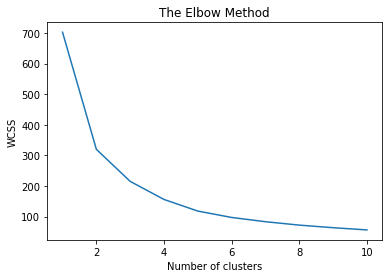

In [45]:
#First, we use the Elbow Method to choose the optimal nº of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X[['X','Y']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
#We choose 4 clusters.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
X['Clusters'] = kmeans.fit_predict(X[['X','Y']])
centers = kmeans.cluster_centers_
labels = kmeans.predict(X[['X','Y']])

In [47]:
#We chose 4 clusters so our database will have 0,1,2,3 as values.
X.head(5)

,OBJECTID,X,Y,Clusters
0,1,-122.323148,47.703140,2
1,2,-122.347294,47.647172,3
2,3,-122.334540,47.607871,3
3,4,-122.334803,47.604803,3
4,5,-122.306426,47.545739,1


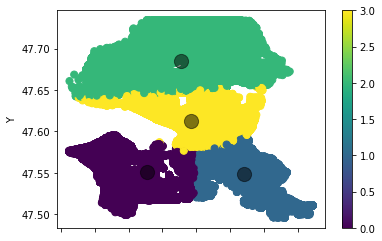

In [48]:
#We can even do some visualization
X.plot.scatter(x = 'X', y = 'Y', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [49]:
#We add the column ('Clusters') to our database using the OBJECTID.
#Finally we drop the X, Y and OBJECTID columns from the database.
X = X[['OBJECTID', 'Clusters']]
database = database.merge(X, left_on='OBJECTID', right_on='OBJECTID')
drop_features = ['OBJECTID', 'X', 'Y']
database.drop(drop_features, axis = 1, inplace= True)
database.head(3)

,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Frame,Clusters
0,2,Matched,Intersection,2,Injury Collision,Angles,2,0,0,2,...,Overcast,Wet,Daylight,10,Entering at angle,0,0,N,Afternoon,2
1,1,Matched,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,...,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N,Evening,3
2,1,Matched,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,...,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N,Late Morning,3


### Categorical Columns

In [50]:
#Now we shouldn't have any problem with missing values but that doesn't mean there are no other inconsistencies.
##The column UNDERINFL (under influence of drugs/alcohol) has "0,1,N,Y" when it should be just "N,Y". We will assume O = N // 1= Y

database.UNDERINFL.mask(database.UNDERINFL.isin(['0']), "N", inplace=True)
database.UNDERINFL.mask(database.UNDERINFL.isin(['1']), "Y", inplace=True)

In [51]:
database['UNDERINFL'].unique()

array(['N', 'Y'], dtype=object)

### Pair-columns

In [52]:
#As we said before, there are pair of columns in the dataset. 
#That means that in one of them the info is coded (_CODE) with numbers while in the other it is described in words.
#Those are: ST_COLCODE & ST_COLDESC // SDOT_COLCODE & SDOT_COLDESC. We will drop one of each (the one that had less NaN values) 

duplicates = ['ST_COLDESC', 'SDOT_COLDESC']
database.drop(duplicates, axis = 1, inplace = True)
database.shape

(171467, 22)

## Categorical Variable Encoding

In [53]:
#We have 22 columns. Out of those, 11 columns are categorical. Let's encode those features.
# Apply the Label encoder to each categorical feature 
from sklearn.preprocessing import LabelEncoder 
cat_features = ['STATUS', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE', 'JUNCTIONTYPE',
         'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'Frame'] 
encoder = LabelEncoder() 
encoded = database[cat_features].apply(encoder.fit_transform)
database.drop(cat_features, axis=1, inplace=True)
database = pd.concat([encoded,database],axis = 1) 
database.head(1)

,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,...,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,Clusters
0,0,1,0,0,1,0,4,7,5,0,...,2,2,0,0,2,11,10,0,0,2


## Correlations

In [54]:
#First we check the columns correlated to our Dependent variable (SEVERITYCODE). 
correlations = database.corr()['SEVERITYCODE'].sort_values(ascending = False)
correlations

SEVERITYCODE.1    1.000000
SEVERITYCODE      1.000000
PEDCOUNT          0.242683
PEDCYLCOUNT       0.212615
ADDRTYPE          0.182001
CROSSWALKKEY      0.171725
SDOT_COLCODE      0.161580
PERSONCOUNT       0.115983
SEGLANEKEY        0.102804
LIGHTCOND         0.036987
UNDERINFL         0.034294
ROADCOND          0.009850
WEATHER           0.002025
STATUS           -0.001670
Clusters         -0.009429
Frame            -0.039731
VEHCOUNT         -0.082966
HITPARKEDCAR     -0.093434
COLLISIONTYPE    -0.123980
ST_COLCODE       -0.143857
JUNCTIONTYPE     -0.189022
SEVERITYDESC     -1.000000
Name: SEVERITYCODE, dtype: float64

In [55]:
#We drop the columns that are highly correlated to our Dependent Variable (SEVERITYCODE)
drop = ['SEVERITYCODE.1', 'SEVERITYDESC']
database.drop(drop, axis=1, inplace= True)
database.shape

(171467, 20)

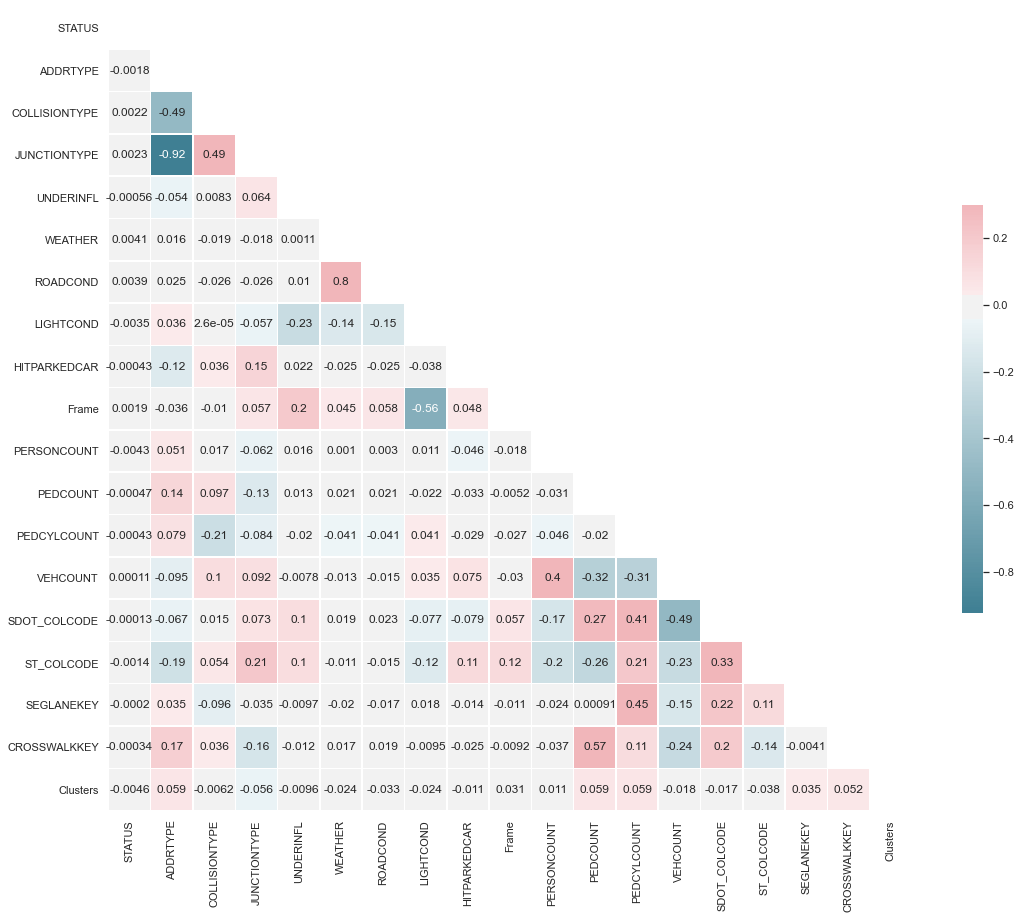

In [56]:
#Now with the Correlation Matrix we check what features are highly correlated.
sns.set(style="white")
corr = database.drop(columns = ['SEVERITYCODE']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot = True)

In [57]:
#We drop the highest correlated pair ('0.92'): ADDRTYPE - JUNCTIONTYPE
database.drop('JUNCTIONTYPE', axis=1, inplace= True)
database.shape

(171467, 19)

## Feature Selection

In [58]:
database.columns

Index(['STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'Frame', 'SEVERITYCODE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'Clusters'],
      dtype='object')

In [59]:
#There are 19 features so let's check if there are unimportant ones that can be excluded from the model. 
#We are going to try 2 approach and build 2 models. Finally we will compare the results and choose the model with the best results.
#First, we change the name of some columns for a better understanding.
column_names = ['STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR',
       'Frame', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'SDOT_COLCODE', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'Clusters', 'SEVERITYCODE']

database = database.reindex(columns = column_names ) 
database.rename(columns = {'STATUS':'STATUS', 'ADDRTYPE':'COLLISIONPLACE', 
                              'COLLISIONTYPE':'COLLISIONTYPE', 'UNDERINFL': 'DRUNK/DRUGGED', 'WEATHER' : 'WEATHER',
                                    'ROADCOND': 'ROADCOND', 'LIGHTCOND': 'LIGHTCOND', 'HITPARKEDCAR':'HITPARKEDCAR',
                                  'Frame':'PARTOFDAY', 'PERSONCOUNT': 'PEOPLEINVOLVED', 'PEDCOUNT': 'PEDINVOLVED',   
                                    'PEDCYLCOUNT': 'BYCICLCOUNT', 'VEHCOUNT': 'VEHCOUNT', 'SDOT_COLCODE': 'CODECOL',
                                   'ST_COLCODE': 'DESCRIPCOL', 'SEGLANEKEY': 'LANESEGMENT', 'CROSSWALKKEY': 'CROSSWALK', 
                                     'Clusters': 'CLUSTERS','SEVERITYCODE': 'SEVERITYCODE'}, inplace = True) 
database.head(1)

,STATUS,COLLISIONPLACE,COLLISIONTYPE,DRUNK/DRUGGED,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,PARTOFDAY,PEOPLEINVOLVED,PEDINVOLVED,BYCICLCOUNT,VEHCOUNT,CODECOL,DESCRIPCOL,LANESEGMENT,CROSSWALK,CLUSTERS,SEVERITYCODE
0,0,1,0,0,4,7,5,0,0,2,0,0,2,11,10,0,0,2,2


In [60]:
#First we will check with a type of Univariate Selection (Chi-squared method)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = database.iloc[:,:-1]  #independent columns
y = database.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs         Score
16       CROSSWALK  2.697813e+09
15     LANESEGMENT  7.483919e+07
14      DESCRIPCOL  3.442892e+04
13         CODECOL  1.346819e+04
10     PEDINVOLVED  1.065864e+04
11     BYCICLCOUNT  7.629970e+03
2    COLLISIONTYPE  4.898943e+03
1   COLLISIONPLACE  3.629938e+03
9   PEOPLEINVOLVED  1.802910e+03
7     HITPARKEDCAR  1.450752e+03


[7.14664953e-06 5.44104328e-02 1.46221803e-01 8.86109644e-03
 4.69816731e-02 1.98265996e-02 4.27263254e-02 9.76571080e-03
 5.78379330e-02 1.39094827e-01 4.98709935e-02 5.07336192e-02
 5.87451717e-02 8.49109649e-02 1.42188305e-01 1.36380041e-02
 2.24402701e-02 5.17391233e-02]


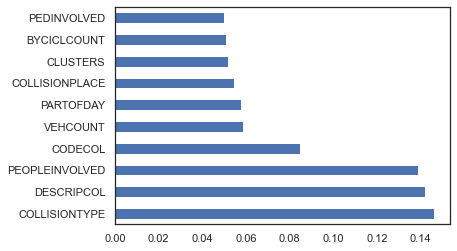

In [61]:
#We will try now with another technique (Feature Importance)

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Splitting into Train and Test Set (CHI-SQUARED VER.)

In [62]:
#This will be our database for our model in the Chi-Squared Version.

X = database[['CROSSWALK','LANESEGMENT', 'DESCRIPCOL' ,'CODECOL' ,'PEDINVOLVED',
              'BYCICLCOUNT','COLLISIONTYPE','COLLISIONPLACE','PEOPLEINVOLVED','HITPARKEDCAR']]

y = database[['SEVERITYCODE']]

In [63]:
#We split into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling

In [64]:
#Now we do some Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the Feature Scaling

X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values #we give the new Scaled DataFrame column names

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values #we give the new Scaled DataFrame each index

X_train = X_train2
X_test = X_test2

X_train.head(1)

,CROSSWALK,LANESEGMENT,DESCRIPCOL,CODECOL,PEDINVOLVED,BYCICLCOUNT,COLLISIONTYPE,COLLISIONPLACE,PEOPLEINVOLVED,HITPARKEDCAR
144605,-0.139549,-0.087441,-0.560205,-0.055882,-0.195311,-0.179165,0.894618,-0.751029,-0.361451,-0.179071


## Modelling

### Choosing the models

In [65]:
#We write down a few interesting Classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Models 

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                random_state = 0)
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
bayes = GaussianNB()
k_nn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
log = LogisticRegression(random_state = 0)

models = [forest, tree, bayes, k_nn, log]
scores = []

### Cross-validation

In [66]:
#Since we have an unbalanced database we use StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for mod in models:
    mod.fit(X_train, y_train.values.ravel())
    acc = cross_val_score(mod, X_train, y_train.values.ravel(), 
                          scoring = "accuracy", cv = kfold, n_jobs = -1)
    scores.append(acc.mean())

In [67]:
#Here we create a table for visualization
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes',
              'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (Chi-Squared)': scores})

result_df = results.sort_values(by='Accuracy (Chi-Squared)', 
                                ascending=False).reset_index(drop=True)
result_df

,Model,Accuracy (Chi-Squared)
0,Random Forest,0.737135
1,Decision Tree,0.736384
2,Logistic Regression,0.732068
3,Naive Bayes,0.730173
4,K Nearest Neighbour,0.711992


### Hyper-parameter tunning

In [68]:
#To make it more time-efficient we will not do GridSearch on K-NN/Bayes since it is the model that gave us the worse results.
#Decision Tree
from sklearn.model_selection import GridSearchCV
criterion = ['gini', 'entropy']
splitter =['best', 'random']
parameters = dict(criterion = criterion, splitter = splitter)


grid_search = GridSearchCV(estimator = tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.66 %
Best Parameters: {'criterion': 'entropy', 'splitter': 'random'}


In [69]:
#Logistic Regression
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = log,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.22 %
Best Parameters: {'C': 0.001, 'penalty': 'l2'}


In [70]:
#Random Forest
n_estimators = [50, 100, 150, 200]
criterion = ['gini','entropy']

parameters = dict(criterion = criterion, n_estimators = n_estimators)


grid_search = GridSearchCV(estimator = forest,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.78 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 200}


In [71]:
#After knowing the best parameters, we do the process again

forest = RandomForestClassifier(n_estimators = 200, 
                            criterion = 'gini', random_state = 0)
tree = DecisionTreeClassifier(criterion = 'entropy', 
                            splitter = 'random', random_state = 0)
bayes = GaussianNB()
k_nn = KNeighborsClassifier(n_neighbors = 18, 
        n_jobs = 1, weights = 'uniform', metric = 'minkowski', p = 2)
log = LogisticRegression(C = 0.001, penalty = 'l2', random_state = 0)

models2 = [forest, tree, bayes, k_nn, log]
scores2 = []

In [72]:
for mod in models2:
    mod.fit(X_train, y_train.values.ravel())
    acc = cross_val_score(mod, X_train, y_train.values.ravel(), 
                          scoring = "accuracy", cv = kfold, n_jobs = -1)
    scores2.append(acc.mean())

In [73]:
#And for the table with the Optimised Results for the Chi-Squared results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes',
              'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (Chi-Squared)': scores, 
    'Accuracy with tuned param (Chi-Squared)' : scores2})

result_df = results.sort_values(by='Accuracy with tuned param (Chi-Squared)', 
                                ascending=False).reset_index(drop=True)
result_df

,Model,Accuracy (Chi-Squared),Accuracy with tuned param (Chi-Squared)
0,Random Forest,0.737135,0.737762
1,Decision Tree,0.736384,0.736625
2,Logistic Regression,0.732068,0.732243
3,K Nearest Neighbour,0.711992,0.730851
4,Naive Bayes,0.730173,0.730173


### Validation

In [74]:
#We finally test each optimised model performance on the Test Set
scores2_1 = []
from sklearn.metrics import accuracy_score
for mod in models2:
    y_pred = mod.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores2_1.append(acc)

In [75]:
#Finally, the table with the Validation results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes',
              'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (Chi-Squared)': scores, 
    'Accuracy with tuned param (Chi-Squared)' : scores2,
    'Accuracy Test Set (Chi-Squared)' : scores2_1})

result_df = results.sort_values(by='Accuracy Test Set (Chi-Squared)', 
                                ascending=False).reset_index(drop=True)
result_df

,Model,Accuracy (Chi-Squared),Accuracy with tuned param (Chi-Squared),Accuracy Test Set (Chi-Squared)
0,Random Forest,0.737135,0.737762,0.739284
1,Decision Tree,0.736384,0.736625,0.738088
2,Logistic Regression,0.732068,0.732243,0.733277
3,Naive Bayes,0.730173,0.730173,0.732286
4,K Nearest Neighbour,0.711992,0.730851,0.713915


## Splitting into Train and Test Set (FEATURE IMPORTANCE)

In [76]:
#This will be our database for our model in the Feature Importance Version.
X = database[['PEDINVOLVED','COLLISIONPLACE','BYCICLCOUNT','CLUSTERS','VEHCOUNT','PARTOFDAY',
              'CODECOL','PEOPLEINVOLVED','DESCRIPCOL','COLLISIONTYPE']]

y = database[['SEVERITYCODE']]

In [78]:
#We split into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling

In [79]:
#Now we do some Feature Scaling
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the Feature Scaling

X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values #we give the new Scaled DataFrame the names of the columns

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values #we give the new Scaled DataFrame the indexes that correspond to each of the rows

X_train = X_train2
X_test = X_test2

## Modelling

### Choosing the models

In [80]:
#Models 
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
bayes = GaussianNB()
k_nn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
log = LogisticRegression(random_state = 0)

models = [forest, tree, bayes, k_nn, log]
scores_fi = []

### Cross-validation

In [81]:
for mod in models:
    mod.fit(X_train, y_train.values.ravel())
    acc = cross_val_score(mod, X_train, y_train.values.ravel(), scoring = "accuracy", cv = kfold, n_jobs = -1)
    scores_fi.append(acc.mean())

In [82]:
#Here we create a table for visualization
results_fi = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes','K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (Feature Importance)': scores_fi})

result_df_fi = results_fi.sort_values(by='Accuracy (Feature Importance)', ascending=False).reset_index(drop=True)
result_df_fi

,Model,Accuracy (Feature Importance)
0,Logistic Regression,0.733038
1,Random Forest,0.731317
2,Decision Tree,0.730588
3,Naive Bayes,0.730559
4,K Nearest Neighbour,0.707836


### Hyper-parameter tunning

In [83]:
#Decision Tree
criterion = ['gini', 'entropy']
splitter =['best', 'random']
parameters = dict(criterion = criterion, splitter = splitter)


grid_search = GridSearchCV(estimator = tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.06 %
Best Parameters: {'criterion': 'gini', 'splitter': 'random'}


In [84]:
#Logistic Regression
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = log,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.31 %
Best Parameters: {'C': 0.01, 'penalty': 'l2'}


In [85]:
#Random Forest
n_estimators = [50, 100, 150, 200]
criterion = ['gini','entropy']

parameters = dict(criterion = criterion, n_estimators = n_estimators)


grid_search = GridSearchCV(estimator = forest,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.37 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 200}


In [86]:
#After knowing the best parameters, we do the process again with the Cross-Validation method
forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 0)
tree = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', random_state = 0)
bayes = GaussianNB()
k_nn = KNeighborsClassifier(n_neighbors = 18, n_jobs = 1, weights = 'uniform', metric = 'minkowski', p = 2)
log = LogisticRegression(C = 0.01, penalty = 'l2', random_state = 0)

models2 = [forest, tree, bayes, k_nn, log]
scores2_fi = []

In [87]:
for mod in models2:
    mod.fit(X_train, y_train.values.ravel())
    acc = cross_val_score(mod, X_train, y_train.values.ravel(), scoring = "accuracy", cv = kfold)
    scores2_fi.append(acc.mean())

In [88]:
#And for the table with the Optimised Results for the Feature Importance method
results_fi = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes','K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (Feature Importance)': scores_fi, 'Accuracy with tuned param (Feature Importance)' : scores2_fi})

result_df_fi = results_fi.sort_values(by='Accuracy with tuned param (Feature Importance)', ascending=False).reset_index(drop=True)
result_df_fi

,Model,Accuracy (Feature Importance),Accuracy with tuned param (Feature Importance)
0,Random Forest,0.731317,0.733679
1,Logistic Regression,0.733038,0.733096
2,Decision Tree,0.730588,0.730603
3,Naive Bayes,0.730559,0.730559
4,K Nearest Neighbour,0.707836,0.727701


### Validation

In [89]:
#We finally test each optimised model performance on the Test Set
scores2_1_fi = []
for mod in models2:
    y_pred = mod.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores2_1_fi.append(acc)

In [90]:
#Finally, the table with the Validation results (Feature Importance)
results_fi = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes','K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (Feature Importance)': scores_fi, 
    'Accuracy with tuned param (Feature Importance)' : scores2_fi,
    'Accuracy Test Set (Feature Importance)': scores2_1_fi})

result_df_fi = results_fi.sort_values(by='Accuracy Test Set (Feature Importance)', ascending=False).reset_index(drop=True)
result_df_fi

,Model,Accuracy (Feature Importance),Accuracy with tuned param (Feature Importance),Accuracy Test Set (Feature Importance)
0,Random Forest,0.731317,0.733679,0.735697
1,Logistic Regression,0.733038,0.733096,0.733773
2,Decision Tree,0.730588,0.730603,0.733569
3,K Nearest Neighbour,0.707836,0.727701,0.733364
4,Naive Bayes,0.730559,0.730559,0.733131


### Concatenation

In [91]:
#And we put both tables together
results_chi = result_df[['Model', 'Accuracy Test Set (Chi-Squared)']]
results_feat = result_df_fi[['Accuracy Test Set (Feature Importance)']]
final_results = results_chi.join(results_feat)
final_results

,Model,Accuracy Test Set (Chi-Squared),Accuracy Test Set (Feature Importance)
0,Random Forest,0.739284,0.735697
1,Decision Tree,0.738088,0.733773
2,Logistic Regression,0.733277,0.733569
3,Naive Bayes,0.732286,0.733364
4,K Nearest Neighbour,0.713915,0.733131


In [99]:
#The model with the best accuracy is the Random Forest (73,93%) of the Chi-squared version.
#Let's check what is the importance of each feature

X = database[['CROSSWALK','LANESEGMENT', 'DESCRIPCOL' ,'CODECOL' ,'PEDINVOLVED',
              'BYCICLCOUNT','COLLISIONTYPE','COLLISIONPLACE','PEOPLEINVOLVED','HITPARKEDCAR']]

y = database[['SEVERITYCODE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
#Now we do some Feature Scaling
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the Feature Scaling

X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values #we give the new Scaled DataFrame column names

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values #we give the new Scaled DataFrame each index

X_train = X_train2
X_test = X_test2

In [101]:
X = 'CROSSWALK','LANESEGMENT', 'DESCRIPCOL' ,'CODECOL' ,'PEDINVOLVED','BYCICLCOUNT', \
    'COLLISIONTYPE','COLLISIONPLACE','PEOPLEINVOLVED','HITPARKEDCAR'

forest = RandomForestClassifier(n_estimators = 200, 
                            criterion = 'gini', random_state = 0)
forest.fit(X_train, y_train.values.ravel())
for name, importance in zip(X, forest.feature_importances_):
    print(name, "=", "{:.2f} %".format(importance*100))

CROSSWALK = 4.11 %
LANESEGMENT = 3.39 %
DESCRIPCOL = 28.13 %
CODECOL = 11.29 %
PEDINVOLVED = 9.11 %
BYCICLCOUNT = 10.03 %
COLLISIONTYPE = 17.85 %
COLLISIONPLACE = 3.54 %
PEOPLEINVOLVED = 12.12 %
HITPARKEDCAR = 0.42 %


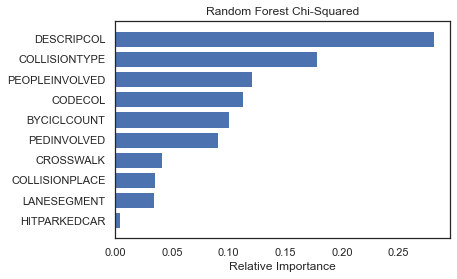

In [102]:
#And we plot it.

features = X
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.title('Random Forest Chi-Squared')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## MODELLING (NO FEATURE SELECTION)

In [103]:
##As an EXTRA, just for the sake of it, let's do the whole modelling with the database without Feature Selection and check results:
X = database.iloc[:,:-1]

y = database.iloc[:,-1]

In [104]:
#We split into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling

In [105]:
#Now we do some Feature Scaling
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the Feature Scaling

X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values #we give the new Scaled DataFrame column names

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values #we give the new Scaled DataFrame each index

X_train = X_train2
X_test = X_test2

X_train.head(1)

,STATUS,COLLISIONPLACE,COLLISIONTYPE,DRUNK/DRUGGED,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,PARTOFDAY,PEOPLEINVOLVED,PEDINVOLVED,BYCICLCOUNT,VEHCOUNT,CODECOL,DESCRIPCOL,LANESEGMENT,CROSSWALK,CLUSTERS
144605,-0.0027,-0.751029,0.894618,-0.23405,0.726142,1.633772,0.608948,-0.179071,0.784453,-0.361451,-0.195311,-0.179165,0.047103,-0.055882,-0.560205,-0.087441,-0.139549,0.032674


## Modelling

### Choosing the models

In [106]:
#Models 

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                random_state = 0)
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
bayes = GaussianNB()
k_nn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
log = LogisticRegression(random_state = 0)

models = [forest, tree, bayes, k_nn, log]
scores_all = []

### Cross-validation

In [107]:
#Since we have an unbalanced database we use StratifiedKFold 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for mod in models:
    mod.fit(X_train, y_train.values.ravel())
    acc = cross_val_score(mod, X_train, y_train.values.ravel(), 
                          scoring = "accuracy", cv = kfold, n_jobs = -1)
    scores_all.append(acc.mean())

In [108]:
#Here we create a table for visualization
results_all = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes',
              'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (No Feature Select.)': scores_all})

result_df_all = results_all.sort_values(by='Accuracy (No Feature Select.)', 
                                ascending=False).reset_index(drop=True)
result_df_all

,Model,Accuracy (No Feature Select.)
0,Logistic Regression,0.732994
1,Random Forest,0.720966
2,Decision Tree,0.713552
3,K Nearest Neighbour,0.704461
4,Naive Bayes,0.388189


### Hyper-parameter tunning

In [109]:
#To make it more time-efficient we will not do GridSearch on K-NN/Bayes since it is the model that gave us the worse results.
#Decision Tree
criterion = ['gini', 'entropy']
splitter =['best', 'random']
parameters = dict(criterion = criterion, splitter = splitter)


grid_search = GridSearchCV(estimator = tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 71.38 %
Best Parameters: {'criterion': 'gini', 'splitter': 'random'}


In [110]:
#Logistic Regression
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = log,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.30 %
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [111]:
#Random Forest
n_estimators = [50, 100, 150, 200]
criterion = ['gini','entropy']

parameters = dict(criterion = criterion, n_estimators = n_estimators)


grid_search = GridSearchCV(estimator = forest,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 72.52 %
Best Parameters: {'criterion': 'entropy', 'n_estimators': 200}


In [112]:
#After knowing the best parameters, we do the process again

forest = RandomForestClassifier(n_estimators = 200, 
                            criterion = 'entropy', random_state = 0)
tree = DecisionTreeClassifier(criterion = 'gini', 
                            splitter = 'random', random_state = 0)
bayes = GaussianNB()
k_nn = KNeighborsClassifier(n_neighbors = 18, 
        n_jobs = 1, weights = 'uniform', metric = 'minkowski', p = 2)
log = LogisticRegression(C = 0.1, penalty = 'l2', random_state = 0)

models2 = [forest, tree, bayes, k_nn, log]
scores2_all = []

In [113]:
for mod in models2:
    mod.fit(X_train, y_train.values.ravel())
    acc = cross_val_score(mod, X_train, y_train.values.ravel(), 
                          scoring = "accuracy", cv = kfold, n_jobs = -1)
    scores2_all.append(acc.mean())

In [114]:
#And for the table with the Optimised Results for the Chi-Squared results
results_all = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes',
              'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (No Feature Select.)': scores_all, 
    'Accuracy with tuned param (No Feature Select.)' : scores2_all})

result_df_all = results_all.sort_values(by='Accuracy with tuned param (No Feature Select.)', 
                                ascending=False).reset_index(drop=True)
result_df_all

,Model,Accuracy (No Feature Select.),Accuracy with tuned param (No Feature Select.)
0,Logistic Regression,0.732994,0.733001
1,K Nearest Neighbour,0.704461,0.728030
2,Random Forest,0.720966,0.725157
3,Decision Tree,0.713552,0.713829
4,Naive Bayes,0.388189,0.388189


### Validation

In [115]:
#We finally test each optimised model performance on the Test Set
scores2_1_all = []
for mod in models2:
    y_pred = mod.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores2_1_all.append(acc)

In [116]:
#Finally, the table with the Validation results
results_all = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes',
              'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy (No Feature Select.)': scores_all, 
    'Accuracy with tuned param (No Feature Select.)' : scores2_all,
    'Accuracy Test Set (No Feature Select.)' : scores2_1_all})

result_df_all = results_all.sort_values(by='Accuracy Test Set (No Feature Select.)', 
                                ascending=False).reset_index(drop=True)
result_df_all

,Model,Accuracy (No Feature Select.),Accuracy with tuned param (No Feature Select.),Accuracy Test Set (No Feature Select.)
0,Logistic Regression,0.732994,0.733001,0.735172
1,K Nearest Neighbour,0.704461,0.728030,0.732169
2,Random Forest,0.720966,0.725157,0.729457
3,Decision Tree,0.713552,0.713829,0.719164
4,Naive Bayes,0.388189,0.388189,0.347583


In [117]:
#And we put both tables together
results_chi = result_df[['Model', 'Accuracy Test Set (Chi-Squared)']]
results_feat = result_df_fi[['Accuracy Test Set (Feature Importance)']]
results_all = result_df_all[['Accuracy Test Set (No Feature Select.)']]
half_results = results_chi.join(results_feat)
final_results = half_results.join(results_all)
final_results

,Model,Accuracy Test Set (Chi-Squared),Accuracy Test Set (Feature Importance),Accuracy Test Set (No Feature Select.)
0,Random Forest,0.739284,0.735697,0.735172
1,Decision Tree,0.738088,0.733773,0.732169
2,Logistic Regression,0.733277,0.733569,0.729457
3,Naive Bayes,0.732286,0.733364,0.719164
4,K Nearest Neighbour,0.713915,0.733131,0.347583


#### More information on this project on:  https://medium.com/@jgarciaportillo/seattle-car-accident-project-ibm-applied-data-science-5b548fdbb25a